Load the data and take a look

# Introduction
This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
R: Yes, it has increased over time on six countries.
+ Has GDP increased over time in the six nations?
R: Yes, it has.
+ Is there a correlation between GDP and life expectancy of a country?
R: Yes, the more GDO increase, the more LEABY increase too.
+ What is the average life expectancy in these nations?
R: The mean of six nations is 72.78 years, meanwhile the mean per nation is:
Chile = 78.94 years,
China = 74.26 years,
Germany = 79.65 years,
Mexico = 75.71 years,
U.S.A = 78.06 years,
Zimbabwe = 50.09 years
+ What is the distribution of that life expectancy?
R: LEABY data had a left skew histogram, which means that most of the observations were on the right side.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data_f = pd.read_csv('all_data.csv')
print(data_f.head())

data_f.shape

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


(96, 4)

In [2]:
# How many countries there are, ando which ones
print(data_f.Country.unique())
print(data_f['Year'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


So, now we know that there are 6 countries, and that the data was taken from 2000 to 2015.

Next step, I am going to edit the colum of "Life expectancy at birth (years)" so it will be easier to work with it.

In [3]:
data_f = data_f.rename({'Life expectancy at birth (years)':'LEABY'}, axis = 'columns')
data_f.head()


,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Now I have a better accesible data frame
Next thing I can do is to see the distributions of the variables

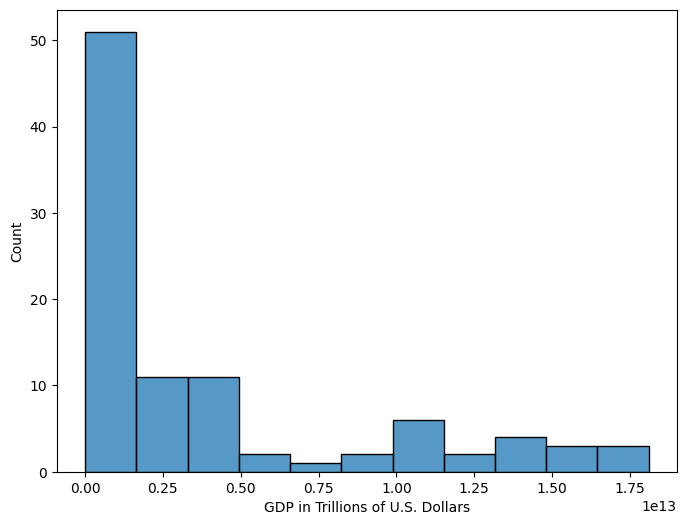

In [4]:
plt.figure(figsize=(8,6))
sns.histplot(data_f.GDP)
plt.xlabel("GDP in Trillions of U.S. Dollars");

Now the distribution of LEABY

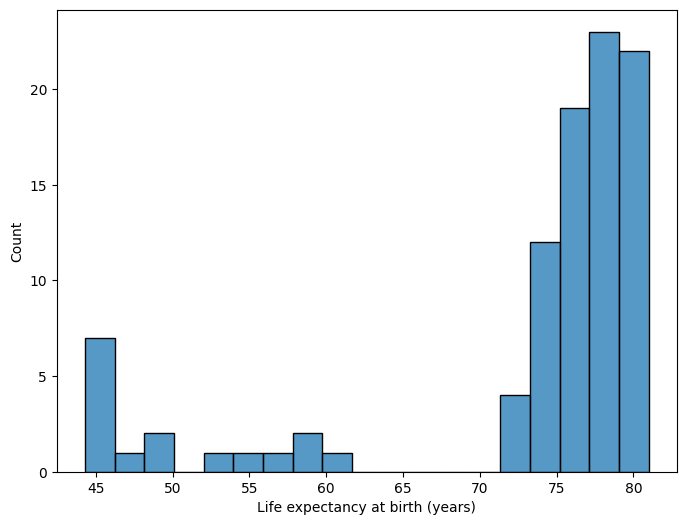

In [5]:
plt.figure(figsize=(8,6))
sns.histplot(data_f.LEABY)
plt.xlabel("Life expectancy at birth (years)");

# Mean of LEABY
Now, what I am going to do is to get the mean of LEABY (Life expectacy at birth year) across the years.
What this does is to call the data from the data frame (data_frame) by grouping the LEABY across the years, then delete the Year column beacause the year's mean its not necessary. Then it gets the mean per each country and lastly, as we now have les rows it is necessary to reset the index.

In [27]:
dfMeans = data_f.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


# Mean plots for GDP and LEABY
Now that we have the means for GDP and LEABY lets analize how the data looks like. We can create some bar plots to visualize it.

- All countries except for Zimbabwe have values between 70-80 for LEABY, meanwhile Zimbabwe has a short LEABY of 50 years.
- For the GDP

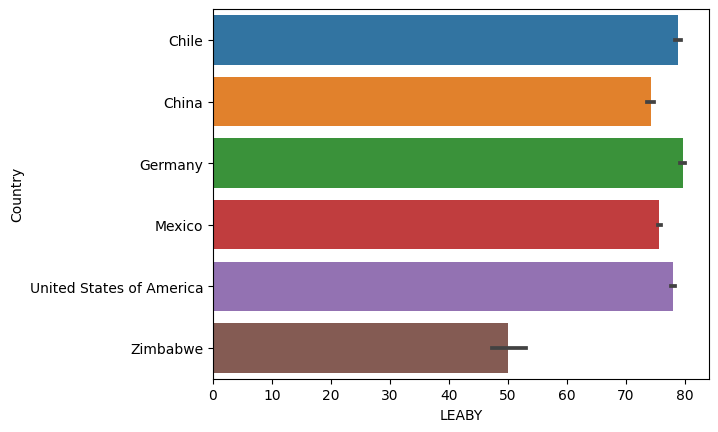

<Figure size 640x480 with 0 Axes>

In [7]:
sns.barplot(data = data_f, x='LEABY', y='Country')
plt.show()
plt.clf()

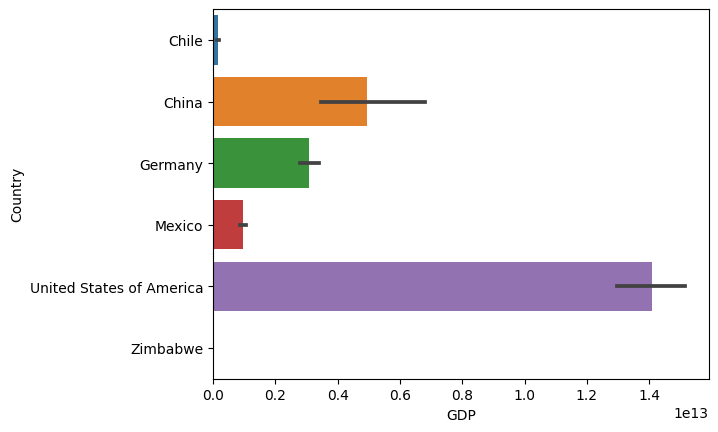

<Figure size 640x480 with 0 Axes>

In [8]:
sns.barplot(data = data_f, x='GDP', y='Country')
plt.show()
plt.clf()

# Swarm Plots
With swarm plots we can see the distributions of the data from each country but not the years of each points. Ths help us to have an idea of the distributions of data on each country.

c:\Users\estra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\estra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


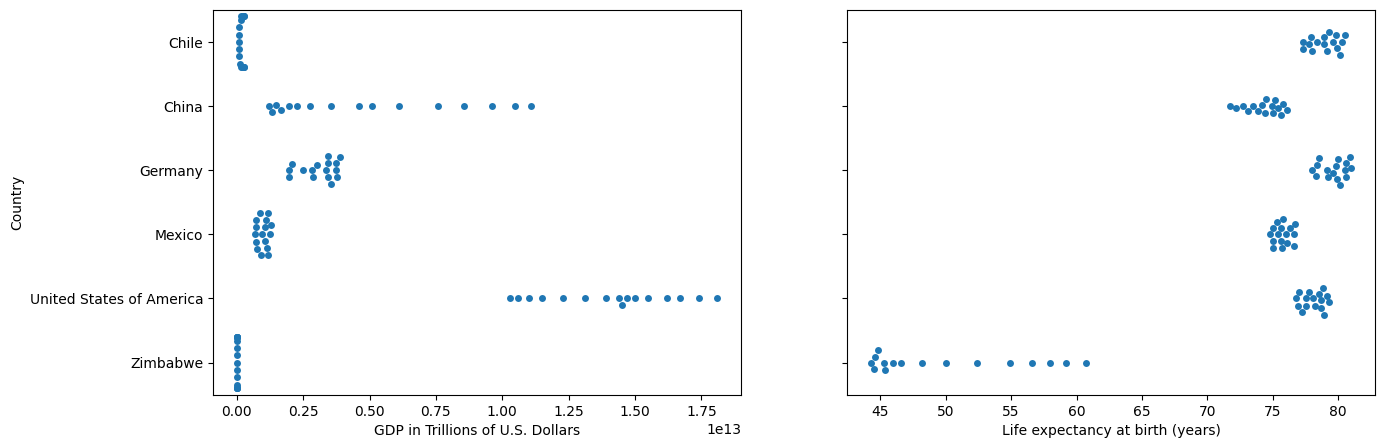

In [9]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
axes[0] = sns.swarmplot(ax=axes[0], x=data_f.GDP, y=data_f.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=data_f.LEABY, y=data_f.Country)
axes[1].set_xlabel('Life expectancy at birth (years)');

# Line Charts
Now, lets see the data across time. Are countries improving over time? 
To answer this question it is neccessary to plot the GDP and LEABY over time.

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

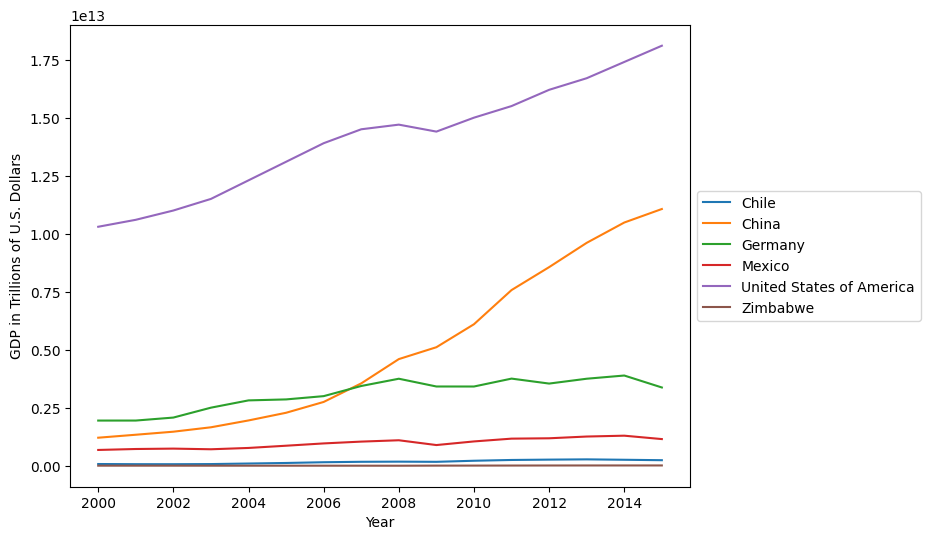

In [17]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data_f.Year, y =data_f.GDP, hue=data_f.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP in Trillions of U.S. Dollars')

Some times it is preferable to plot this kind of plots individually because you can't appretiate the growth of countries due to the difference growth rate between the countries with highest and lowest values.

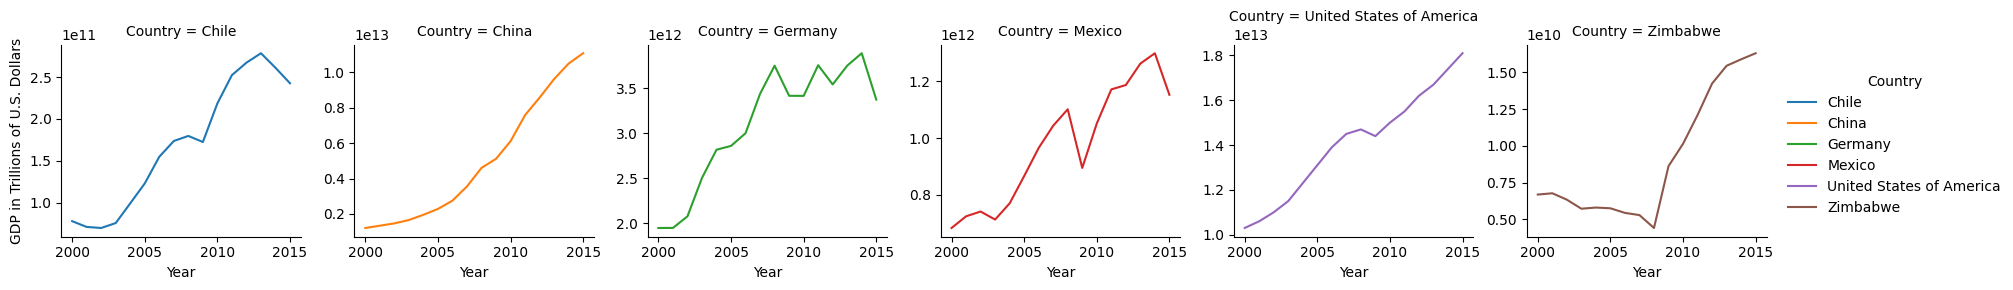

In [15]:
graphGDP = sns.FacetGrid(data_f, col='Country', col_wrap=6,
                         hue = 'Country', sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'GDP')
            .add_legend()
            .set_axis_labels('Year', 'GDP in Trillions of U.S. Dollars'))
graphGDP

LEABY over time 

Text(0, 0.5, 'Life Expectancy At Birth Year')

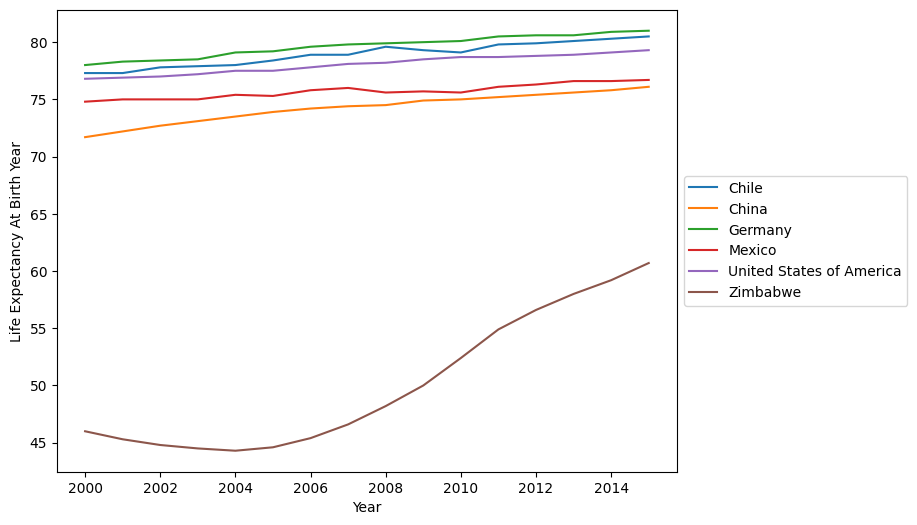

In [18]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data_f.Year, y =data_f.LEABY, hue=data_f.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life Expectancy At Birth Year')

We can slightly visualize the behaviour of the LEABY increase respect to the years, the country with the highes LEABY increase is Zimbabwe. And the country with the highes LEABY is Germany, all countries are increasing their LEABY over time.
Now lets see them separate, to deaply see what is happening in each country.

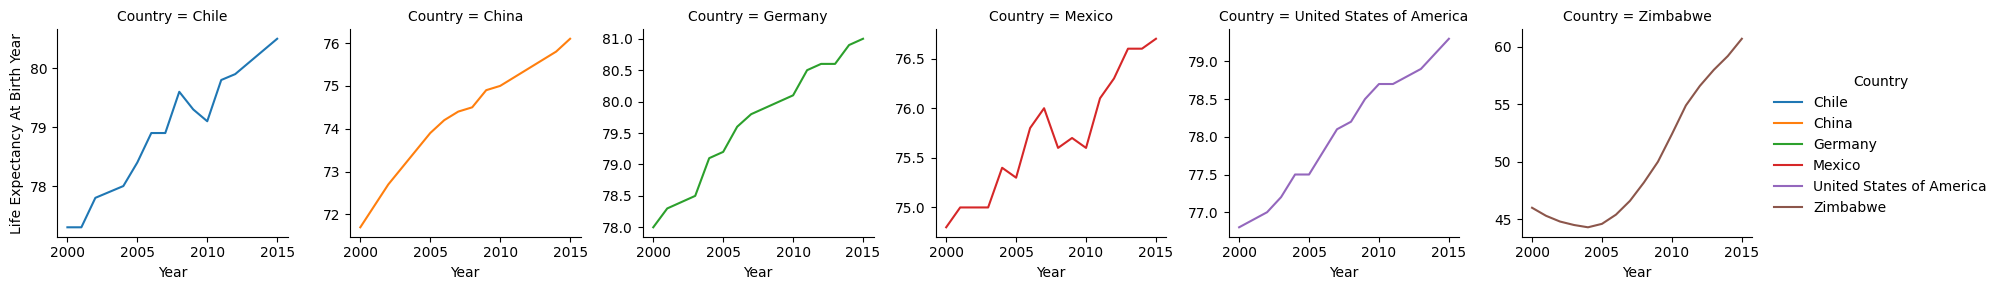

In [21]:
graphGDP = sns.FacetGrid(data_f, col='Country', col_wrap=6,
                         hue = 'Country', sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'LEABY')
            .add_legend()
            .set_axis_labels('Year', 'Life Expectancy At Birth Year'))
graphGDP;

# Relation between GDP and LEABY
Now that we have finish analyzing these 2 variables, it is time to check if there is a relationship between these two variables. So, next step will be ploting them together and see their relation or if we can create a linear regression.

<Axes: xlabel='LEABY', ylabel='GDP'>

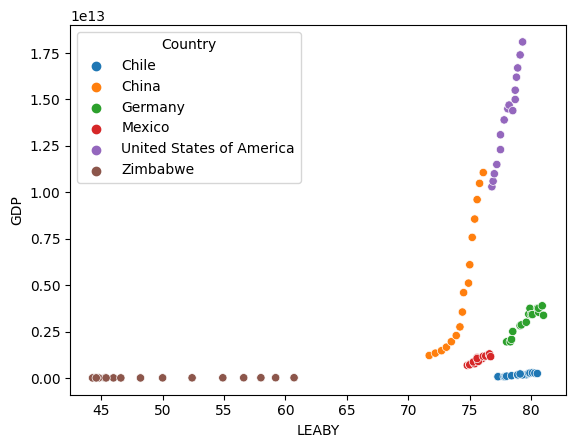

In [22]:
sns.scatterplot(x=data_f.LEABY, y=data_f.GDP, hue=data_f.Country)

It is difficult to get conclusions with this grouped data, but the first impressions are that there is a relation that meanwhile the LEABY is increasing GDP too.

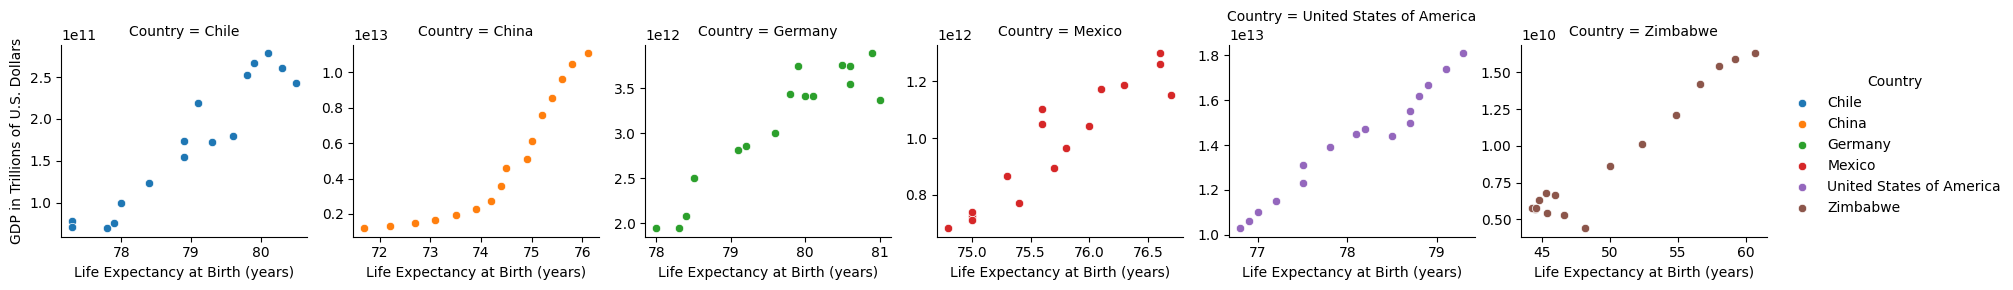

In [25]:
graph = sns.FacetGrid(data_f, col='Country', col_wrap=6,
                      hue='Country', sharey=False, sharex=False)
graph = (graph.map(sns.scatterplot, 'LEABY', 'GDP')
         .add_legend()
         .set_axis_labels('Life Expectancy at Birth (years)', 'GDP in Trillions of U.S. Dollars'));

Finally, we can see that both LEABY and GDP are increasing over time.
Now, we can answer the questions from the beginning.